# Ejemplo: Flecha y cojinete

Una flecha será embonada en un cojinete como se muestra a continuación

<img src="https://github.com/Medetl/Simulacion/blob/main/Unidad%20II/cojinete.png?raw=1">

Si $x_1$ sigue una distribución normal con media $1.5$ y varianza $0.0016$, y $x_2$ esta misma distribución con media $1.48$ y varianza $0.0009$, determine:

a) La probabilidad de que haya interferencia.

b) El número de veces que es necesario simular el experimento, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de $0.01$, con un nivel de seguridad del $95\%.$

Vamos a resolver este problema, procurando seguir la metodología vista en el curso.

### 1. Identifique las variables

Tenemos dos: $x_1$ y $x_2$.

### 2 y 3. Determine la distribución de probabilidad y modele las variables aleatorias

En el planteamiento ya se especifica que $x_1 \sim N(1.5, 0.04)$ y que $x_1 \sim N(1.48, 0.03)$.

### 4. Defina el modelo del sistema y los objetivos de la simulación

La diferencia $x_1 - x_2$ modela adecuadamente el sistema.

Si $x_2 - x_1 > 0$ el diametro de la flecha es más grande que el espacio en el cojinte y, por tanto, hay interferencia. De lo contrario, las piezas embonan sin problema.

Objetivo: determinar la frecuencia con que esto ocurre, lo cual nos da una esrimación de la probabilidad de interefrencia.

Una forma de implementarlo es mediante el siguiente código.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def interferencia():                #Esta función devuelve el valor 1 si hay interferencia o 0 si no la hay.
    interf=0
    x_1 = random.gauss(1.50,0.04)    #La funcion gauss genera un número que sigue una distribucion normal con
    x_2 = random.gauss(1.48,0.03)   # la media y la desvicion estandar especificados.
    if 0.0 < x_2 - x_1:
        interf += 1
    return interf

In [3]:
interferencia()

0

### 5. Diseñe el experimento

Para estimar la probabilidad de interferencia, ejecutamos $n$ veces la función anterior y calculamos de manera acumulativa
la probabilidad de interferencia.

In [15]:
def prob_inter(n):
    prob = []                       # Esta funcion devuelve esta lista "prob", con los valores de la probabilidad
    inter = 0                       # estimada al contar las veces que hay interferencia y dividir entre las veces que
    for i in range(n):              # se ha reptido la observacion mientras aumenta el numero de iteraciones.
        inter += interferencia()
        prob.append(inter/(i+1))
    return prob

In [16]:
X = prob_inter(500)             # Asignamos valores a n y realizamos el experimento

[1.0, 1.0, 0.6666666666666666, 0.5, 0.4, 0.5, 0.42857142857142855, 0.5, 0.4444444444444444, 0.5, 0.45454545454545453, 0.4166666666666667, 0.46153846153846156, 0.5, 0.5333333333333333, 0.5, 0.5294117647058824, 0.5, 0.47368421052631576, 0.45, 0.42857142857142855, 0.45454545454545453, 0.43478260869565216, 0.4583333333333333, 0.48, 0.5, 0.5185185185185185, 0.5, 0.4827586206896552, 0.4666666666666667, 0.45161290322580644, 0.4375, 0.45454545454545453, 0.4411764705882353, 0.42857142857142855, 0.4166666666666667, 0.43243243243243246, 0.42105263157894735, 0.4358974358974359, 0.425, 0.4146341463414634, 0.42857142857142855, 0.4186046511627907, 0.4090909090909091, 0.4, 0.391304347826087, 0.3829787234042553, 0.375, 0.3877551020408163, 0.38, 0.39215686274509803, 0.38461538461538464, 0.39622641509433965, 0.3888888888888889, 0.4, 0.4107142857142857, 0.42105263157894735, 0.43103448275862066, 0.423728813559322, 0.4166666666666667, 0.4098360655737705, 0.41935483870967744, 0.42857142857142855, 0.4375, 0.4

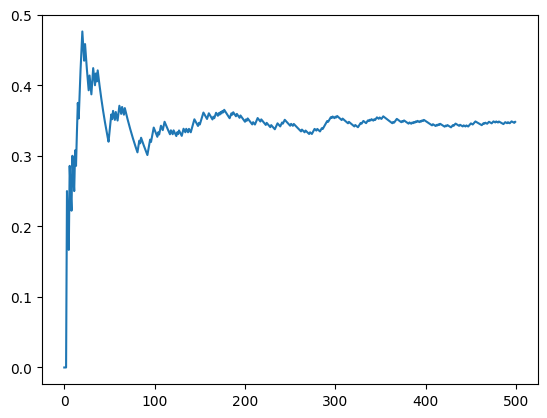

In [6]:
plt.plot(X)                         # La gráfica muestra que la convergencia está garantizada con 500 iteraciones
                                    # Sin embargo, diferentes ejecuciones darán resultados distintos

In [26]:
print(np.mean(X), np.std(X))

0.3726996846988185 0.056027576002217555


### 6. Repita el experimento $n$ veces

Una forma de hacerlo es mediante el siguiente codigo.

In [8]:
def modelo(n):
    lista=[]
    for i in range(n):
        s = prob_inter(500)
        lista.append(np.mean(s))
    return lista

In [9]:
Y=modelo(120)

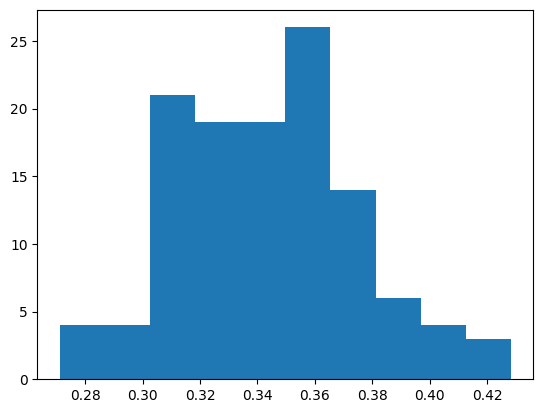

In [10]:
plt.hist(Y)
plt.show()

In [11]:
print(np.mean(Y), np.std(Y))

0.3437816658870956 0.031438942291494895


### Paso 7. Hallamos el intervalo de confianza.

$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

In [12]:
np.mean(Y)

0.3437816658870956

In [13]:
np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50)

(0.33506723568633734, 0.3524960960878538)

### Para determinar el número de simulaciones

$$ N > \Bigg( \frac{2 \sigma z_{\alpha/2}}{\epsilon} \Bigg) ^2 $$

In [27]:
N = (2*(np.std(X)*1.96)/0.01)**2

In [28]:
print(N)

482.3650139977547


### Podemos comparar con la sulución analítica del problema.

Para ello usamos la teoría sobre la suma de variables con distribución normal.

In [17]:
norm.cdf(-0.04, -0.02, 0.05)

0.3445782583896758

In [18]:
norm.cdf(-0.04, -0.02, 0.05)-np.mean(Y)

0.0007965925025802401

# **Solucion analitica**
a)

Sea  $x_1 \sim N(1.5, 0.04)$ y que $x_1 \sim N(1.48, 0.03)$.


Y ademas sabemos que la interferencia ocurre cuando $x_2>x_1$

Por el teoría sobre la suma de variables con distribución normal:

Sean

 $X \sim N(\mu, δ^2 )$ ; $Y \sim N(\mu, δ^2 )$

$X-Y \sim ({\mu_x}- {\mu_y}, {δ_x^2}+{δ_y^2})$

Asi

$X-Y\sim N(−0.02,0.05^2)$

Con esto, podemos calcular la probabilidad de interferencia $P(x_2>x_1)$ que podemos denotar como $P(D>0)$


Entonces buscamos

$P(Z< \frac{x-μ}{δ})$

$P(Z< \frac{0-0.02}{0.05})$

$P(Z< -0.04)= 0.3446$

Por lo tanto, la probabilidad de interferencia es aproximadamente 0.3446

b)

Para determinar el número de simulaciones necesario para que la probabilidad estimada de interferencia difiera de su valor verdadero en menos de 0.01 con un nivel de confianza del 95%, usamos la fórmula de la estimación de proporciones:

La formula $$ N > \Bigg( \frac{2 \sigma z_{\alpha/2}}{\epsilon} \Bigg) ^2 $$

para determinar el número de simulaciones necesarias proviene de los conceptos de inferencia estadística y, más específicamente, de la teoría del intervalo de confianza

Asi

$δ_̂p =\sqrt{\frac{p(1-p)}{n}}$

Donde p es la proporción estimada y n es el número de simulaciones.
Para construir un intervalo de confianza al 95%, usamos el valor crítico $Z_{α/2}$ de la distribución normal estándar

Por lo que el intervalo de confianza para p es

$p(+-) Z_{α/2}* δ_p$

Y si queremos que el margen de error del intervalo de confianza sea menor que un valor especificado, en este caso

$ϵ=0.01$

Entonces, queremos que
$Z_{α/2}* δ_p < ϵ$

Sustituyendo $δ_p$

$Z_{α/2}* \sqrt{\frac{p(1-p)}{n}}  < ϵ$

Elevamos ambos lados al cuadrado

$Z_{α/2} ^2* \frac{p(1-p)}{n}  < ϵ^2$

Para hallar n

$n> (\frac{Z_{α/2} ^2 *p(1-p)}{ ϵ^2})$

y sea $δ=\sqrt{p(1-p)}$

Entonces

$n> (\frac{(Z_{α/2}) ^2 δ }{ ϵ^2})$

multiplicamos por un factor 2 adicional para ajustar la estimación de n

$N> (\frac{2 Z_{α/2}*  δ }{ ϵ})^2$

Sustituyendo nuestros valores, tenemos

$N=(\frac{2* 1.96*0.0560}{0.01})^2$
$N=482.3$

Para obtener el intervalo de confianza

Si $\bar{x}$ es la media de una muestra aleatoria de tamaño n de una poblacion de la que se conoce su $δ^2$, lo que da un intervalo de confianza de $100(1-α)$% para $μ$ es

$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

Sustituyendo nuestros valores

$$0.34378 - 1.96 (\frac{0.03143894}{\sqrt{50}}) < \mu < 0.34378 + 1.96 (\frac{0.03143894}{\sqrt{50}})  $$

Nuestro intervalo de confianza al 95% es

$(0.3350, 0.3524)$
